In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [19]:
df= pd.read_csv('../Dataset/Space Mission Analysis.csv')
df

,Unnamed: 0.1,Unnamed: 0,Company Name,Location,Datum,Detail,Status Rocket,Rocket,Status Mission
0,0,0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success
1,1,1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,2,2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success
3,3,3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success
4,4,4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success
...,...,...,...,...,...,...,...,...,...
4319,4319,4319,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Wed Feb 05, 1958 07:33 UTC",Vanguard | Vanguard TV3BU,StatusRetired,NaN,Failure
4320,4320,4320,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA","Sat Feb 01, 1958 03:48 UTC",Juno I | Explorer 1,StatusRetired,NaN,Success
4321,4321,4321,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Fri Dec 06, 1957 16:44 UTC",Vanguard | Vanguard TV3,StatusRetired,NaN,Failure
4322,4322,4322,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan","Sun Nov 03, 1957 02:30 UTC",Sputnik 8K71PS | Sputnik-2,StatusRetired,NaN,Success


# Data Preparation

In [20]:
df=df.drop('Unnamed: 0.1' , axis=1)
df=df.drop('Unnamed: 0' , axis=1)
df

,Company Name,Location,Datum,Detail,Status Rocket,Rocket,Status Mission
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success
...,...,...,...,...,...,...,...
4319,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Wed Feb 05, 1958 07:33 UTC",Vanguard | Vanguard TV3BU,StatusRetired,NaN,Failure
4320,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA","Sat Feb 01, 1958 03:48 UTC",Juno I | Explorer 1,StatusRetired,NaN,Success
4321,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Fri Dec 06, 1957 16:44 UTC",Vanguard | Vanguard TV3,StatusRetired,NaN,Failure
4322,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan","Sun Nov 03, 1957 02:30 UTC",Sputnik 8K71PS | Sputnik-2,StatusRetired,NaN,Success


### Identify missing values and handle it


In [21]:
df.dtypes

Company Name      object
Location          object
Datum             object
Detail            object
Status Rocket     object
 Rocket           object
Status Mission    object
dtype: object

In [22]:
df.isnull().sum()

Company Name         0
Location             0
Datum                0
Detail               0
Status Rocket        0
 Rocket           3360
Status Mission       0
dtype: int64

In [23]:
df.columns

Index(['Company Name', 'Location', 'Datum', 'Detail', 'Status Rocket',
       ' Rocket', 'Status Mission'],
      dtype='object')

### Rename columns if needed

In [24]:
df=df.rename(columns={' Rocket' :'Price'})
df=df.rename(columns={'Detail':'Rocket'})
df=df.rename(columns={'Status Rocket':'Rocket Status'})
df=df.rename(columns={'Status Mission':'Mission Status'})

In [25]:
df.Price=df.Price.fillna(0)

In [26]:
df

,Company Name,Location,Datum,Rocket,Rocket Status,Price,Mission Status
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,0,Success
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success
...,...,...,...,...,...,...,...
4319,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Wed Feb 05, 1958 07:33 UTC",Vanguard | Vanguard TV3BU,StatusRetired,0,Failure
4320,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA","Sat Feb 01, 1958 03:48 UTC",Juno I | Explorer 1,StatusRetired,0,Success
4321,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Fri Dec 06, 1957 16:44 UTC",Vanguard | Vanguard TV3,StatusRetired,0,Failure
4322,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan","Sun Nov 03, 1957 02:30 UTC",Sputnik 8K71PS | Sputnik-2,StatusRetired,0,Success


### Extract month and year column

In [122]:
df['Month']=df.Datum.str[4:7]
df['Year']=df.Datum.str[12:16]

### Convert data types if needed

In [124]:
df.Price = df.Price.replace(',' , '',regex=True).astype('float64')
df.Year=df.Year.replace('','0',regex=True)
df.Year=df.Year.astype('int64')

# Exploratory Data Analysis (EDA)

### What is the distribution of numerical features such as mission cost and launch Year

In [10]:
df.describe()

,Company Name,Location,Datum,Rocket,Rocket Status,Price,Mission Status
count,4324,4324,4324,4324,4324,4324,4324
unique,56,137,4319,4278,2,57,4
top,RVSN USSR,"Site 31/6, Baikonur Cosmodrome, Kazakhstan","Wed Nov 05, 2008 00:15 UTC",Cosmos-3MRB (65MRB) | BOR-5 Shuttle,StatusRetired,0,Success
freq,1777,235,2,6,3534,3360,3879


### What is the frequency distribution of categorical features like Company Name,Rocket,and Mission Status?

In [11]:
df['Company Name'].value_counts()

Company Name
RVSN USSR           1777
Arianespace          279
CASC                 251
General Dynamics     251
NASA                 203
VKS RF               201
US Air Force         161
ULA                  140
Boeing               136
Martin Marietta      114
SpaceX               100
MHI                   84
Northrop              83
Lockheed              79
ISRO                  76
Roscosmos             55
ILS                   46
Sea Launch            36
ISAS                  30
Kosmotras             22
US Navy               17
ISA                   13
Rocket Lab            13
Eurockot              13
ESA                   13
Blue Origin           12
IAI                   11
ExPace                10
ASI                    9
CNES                   8
AMBA                   8
MITT                   7
JAXA                   7
Land Launch            7
UT                     5
KCST                   5
CASIC                  5
Exos                   4
CECLES                 4
Arm??e de l'

In [28]:
df['Mission Status'].value_counts()

Mission Status
Success              3879
Failure               339
Partial Failure       102
Prelaunch Failure       4
Name: count, dtype: int64

In [30]:
df.Rocket.value_counts()

Rocket
Cosmos-3MRB (65MRB) | BOR-5 Shuttle    6
Lambda-IV S | Osumi                    5
Titan IV(402)B | DSP                   5
Titan IIID | KH-11                     5
Proton K/Block D | Zond                4
                                      ..
Ariane 44P | Intelsat 709              1
Ariane 5 G | Cluster                   1
Delta II 7925 | Galaxy 9               1
Space Shuttle Endeavour | STS-77       1
Sputnik 8K71PS | Sputnik-1             1
Name: count, Length: 4278, dtype: int64

# Top Agencies Analysis

### Which Organizations have counducted the most launch

In [59]:
c

,Company Name,Location,Datum,Rocket,Status Rocket,Price,Status Mission,Month,Year
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.00,Success,Aug,2020
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,Aug,2020
2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,0.00,Success,Aug,2020
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.00,Success,Jul,2020
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.00,Success,Jul,2020
...,...,...,...,...,...,...,...,...,...
4319,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Wed Feb 05, 1958 07:33 UTC",Vanguard | Vanguard TV3BU,StatusRetired,0.00,Failure,Feb,1958
4320,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA","Sat Feb 01, 1958 03:48 UTC",Juno I | Explorer 1,StatusRetired,0.00,Success,Feb,1958
4321,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Fri Dec 06, 1957 16:44 UTC",Vanguard | Vanguard TV3,StatusRetired,0.00,Failure,Dec,1957
4322,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan","Sun Nov 03, 1957 02:30 UTC",Sputnik 8K71PS | Sputnik-2,StatusRetired,0.00,Success,Nov,1957


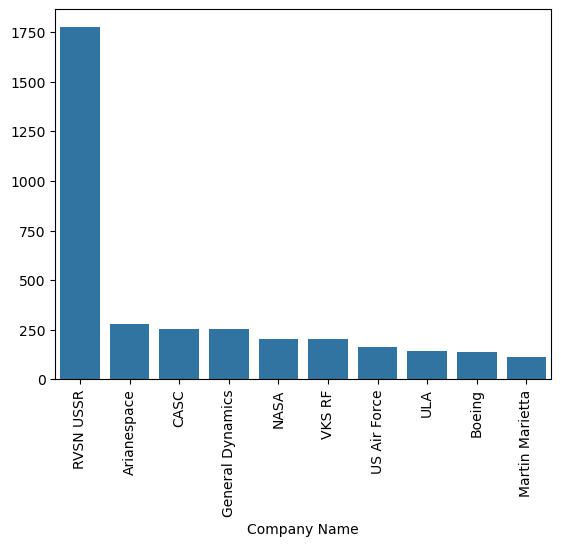

In [60]:
e=df['Company Name'].value_counts().nlargest(10)
sb.barplot(x=e.index,y=e.values)
plt.xticks(rotation=90)
plt.show()

In [61]:
df[df['Status Mission']=='Success'].groupby('Company Name').size().sort_values(ascending=False)

Company Name
RVSN USSR           1614
Arianespace          269
CASC                 231
General Dynamics     203
VKS RF               188
NASA                 186
ULA                  139
Boeing               131
US Air Force         129
Martin Marietta      100
SpaceX                94
MHI                   80
Northrop              74
Lockheed              74
ISRO                  63
Roscosmos             51
ILS                   45
Sea Launch            33
ISAS                  26
Kosmotras             21
Blue Origin           12
Eurockot              12
Rocket Lab            11
IAI                    9
ESA                    9
ASI                    9
ExPace                 9
Land Launch            6
MITT                   6
CNES                   6
JAXA                   6
ISA                    4
AMBA                   4
CASIC                  3
Arm??e de l'Air        3
KCST                   2
US Navy                2
Yuzhmash               2
OKB-586                2
SRC         

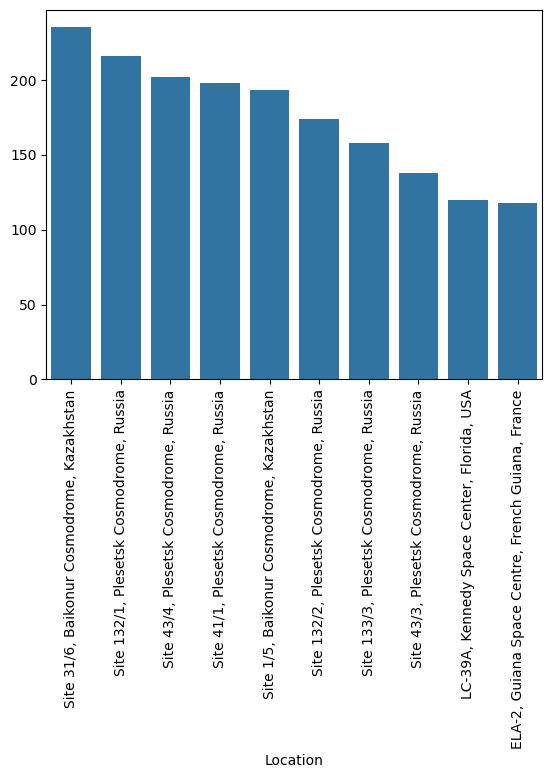

In [79]:
f=df['Location'].value_counts().nlargest(10)
sb.barplot(x=f.index,y=f.values)
plt.xticks(rotation=90)
plt.show()

In [63]:
df[df['Status Mission']=='Success'].groupby('Location').size()

Location
Blue Origin Launch Site, West Texas, Texas, USA       12
Brigitte, Hammaguir, Algeria, France                   3
ELA-1, Guiana Space Centre, French Guiana, France     12
ELA-2, Guiana Space Centre, French Guiana, France    115
ELA-3, Guiana Space Centre, French Guiana, France    104
                                                    ... 
Svobodny Cosmodrome, Russia                            5
Tai Rui Barge, Yellow Sea                              1
Taiyuan Satellite Launch Center, China                 5
Uchinoura Space Center, Japan                          2
Xichang Satellite Launch Center, China                 1
Length: 128, dtype: int64

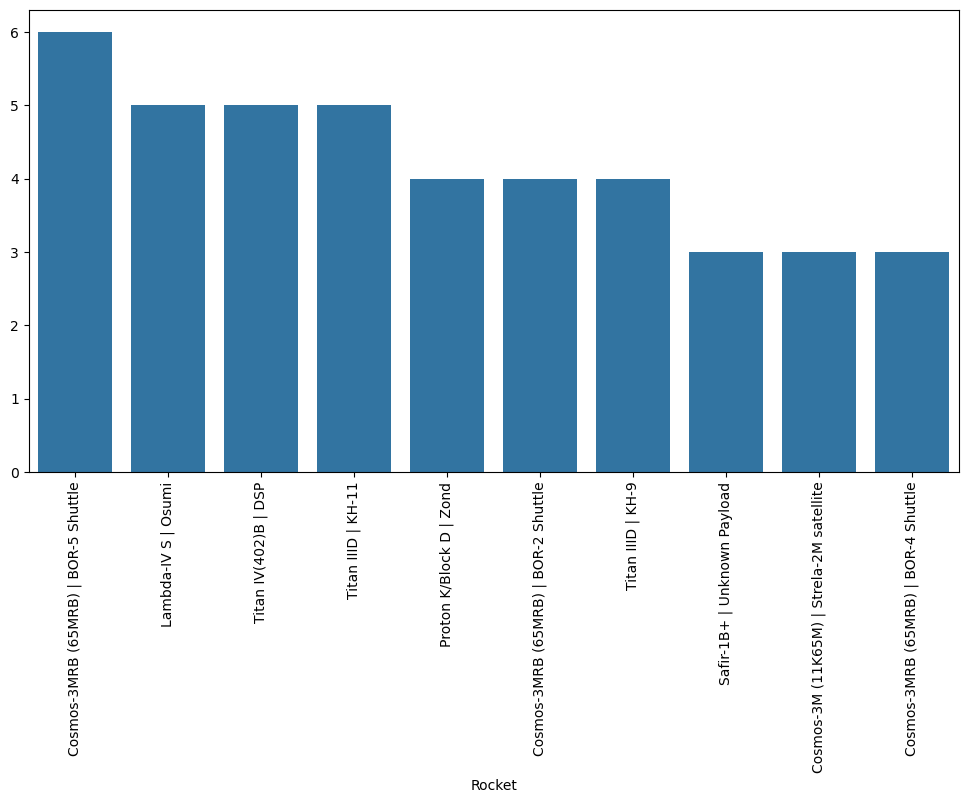

In [76]:
a=df['Rocket'].value_counts().nlargest(10)

plt.figure(figsize=(12,6))
sb.barplot(x=a.index,y=a.values)
plt.xticks(rotation=90)
plt.show()

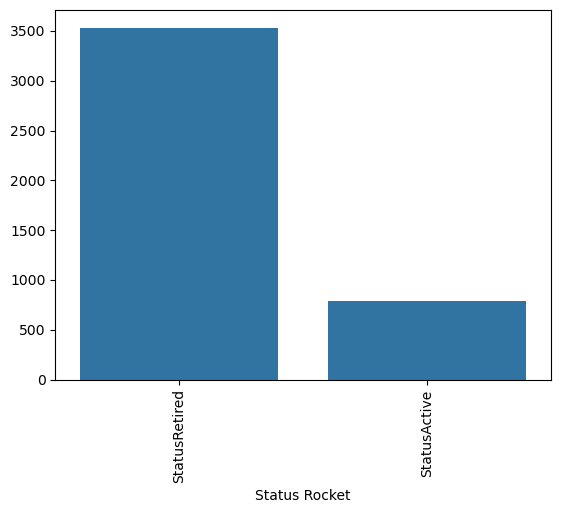

In [72]:
b=df['Status Rocket'].value_counts().nlargest(10)
sb.barplot(x=b.index,y=b.values)
plt.xticks(rotation=90)
plt.show()

In [66]:
df[['Company Name','Price']].groupby('Company Name').mean()

,Price
Company Name,
AEB,0.000000
AMBA,0.000000
ASI,0.000000
Arianespace,58.584229
Arm??e de l'Air,0.000000
Blue Origin,0.000000
Boeing,9.125000
CASC,25.260000
CASIC,0.000000


In [67]:
df[df['Status Mission']=='Success']['Price'].mean()

36.9609538540861

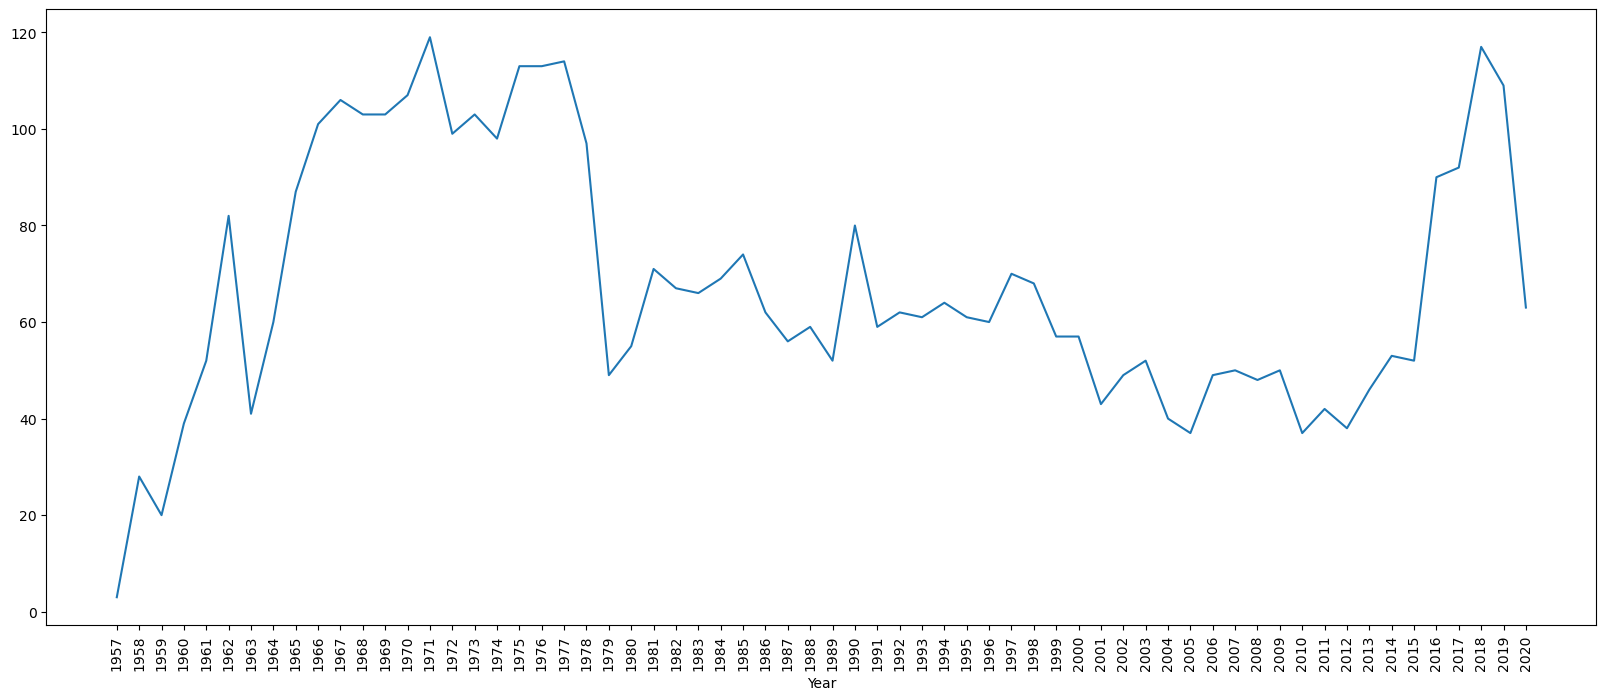

In [68]:
c=df['Year'].value_counts().sort_index()
plt.figure(figsize=(20,8))
sb.lineplot(x=c.index,y=c.values)
plt.xticks(rotation=90)
plt.show()

In [69]:
df.groupby('Status Mission')['Price'].mean().nlargest(10)

Status Mission
Success              36.960954
Partial Failure      23.501961
Prelaunch Failure    15.500000
Failure               7.153215
Name: Price, dtype: float64

In [70]:
tt=df.groupby(['Year','Status Mission']).size().reset_index()
tt

,Year,Status Mission,0
0,1957,Failure,1
1,1957,Success,2
2,1958,Failure,20
3,1958,Partial Failure,2
4,1958,Success,6
...,...,...,...
173,2019,Partial Failure,2
174,2019,Prelaunch Failure,1
175,2019,Success,100
176,2020,Failure,6


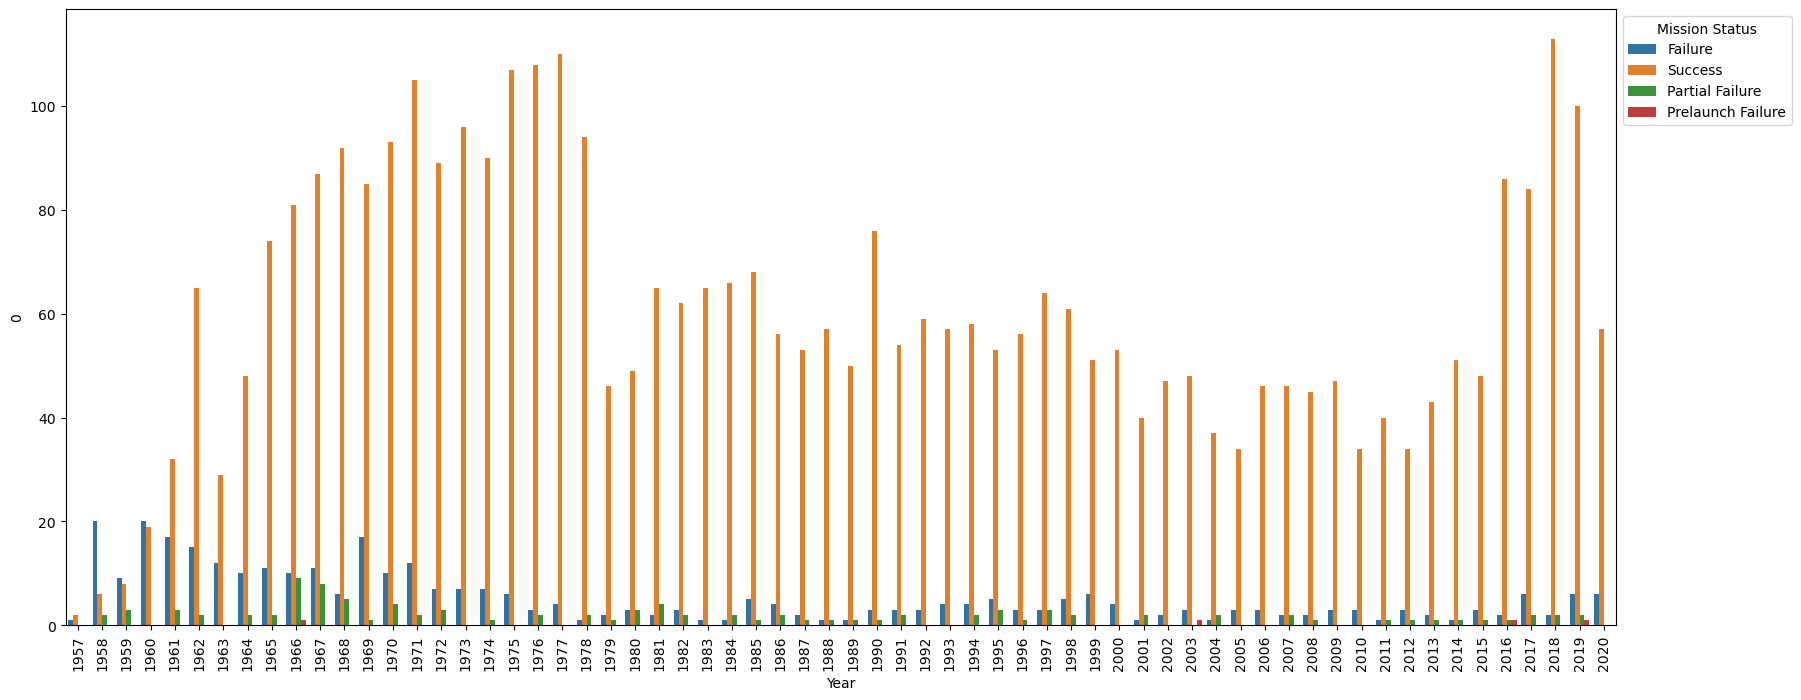

In [71]:
plt.figure(figsize=(20,8))
sb.barplot(x=tt.Year,y=tt[0],hue=tt['Status Mission'])
plt.xticks(rotation=90)
plt.legend(title='Mission Status',bbox_to_anchor=(1.0,1.0))
plt.show()